<h1 style='text-align:center'>Python Intro to units and constants in Astropy and LaTeX </h1>

<br>
<strong>
    TF: Maurice Wilson<br>
    Astron 100 Section<br>
    Spring 2021
</strong>

When performing many calculations, it is useful to keep track of the units for your physical quantites.  In this class, we've seen how the detector scale can be in units of arcseconds per pixel or how flux can be in units of analag-to-digital units (ADUs), Janskies (Jy), micro-Janskies ($\mu$Jy), or even $\rm{erg}\ s^{-1}\ \rm{cm}^{-2}\ \rm{Hz}^{-1}$.

We can use the astropy module to keep track of the units as calculations are performed.  When plotting results, we can use LaTeX syntax to easily print out the units.

In [2]:
from astropy import units as u

In [4]:
d_star = 2 * u.pc

print(d_star)

2.0 pc


In [7]:
f_star = 3e5 * u.erg / u.s / u.cm**2 / u.Hz

print(f_star)

300000.0 erg / (cm2 Hz s)


In [8]:
velocity = u.Quantity( 15 , 'km/s')

print(velocity)

velocity = velocity.to('m/s')

print(velocity)

15.0 km / s
15000.0 m / s


In [10]:
mass = u.Quantity( 0.002 , u.kg )  # in terms of computation speed, this is faster

kinetic_energy = 1./2. * mass* velocity**2

print(kinetic_energy)  # units have automatically changed due to math calculations being performed.

225000.0 kg m2 / s2


In [18]:
# convert the SI units (or "mks" units) to "cgs" units

kinetic_energy = kinetic_energy.cgs  # in 'cgs' units, the energy units become 'erg'

print(kinetic_energy)
print('')

# for the sake of simplicity with your computations, make the quantity unit-less
print( kinetic_energy.value )
print('')


# convert back to SI units, which in this case would be Joules
print( kinetic_energy.si )  
print( kinetic_energy.to('J') ) 
print( kinetic_energy.to( u.J ) ) 

2250000000000.0 erg

2250000000000.0

225000.00000000003 s W
225000.00000000003 J
225000.00000000003 J


Let's take a quick look at constants.  Instead of memorizing them or looking up their values, we can use astropy, which already has astropy.units attached to the physical constants.

In [19]:
from astropy import constants as c

In [24]:
# speed of light
print( c.c )
print('')
print( c.c.cgs ) # in cgs units
print('')
print('')

# Stefann-Boltzmann constant
print( c.sigma_sb )
print('')
print('')

# mass of a proton
print( c.m_p.cgs )
print('')

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018

29979245800.0 cm / s


  Name   = Stefan-Boltzmann constant
  Value  = 5.6703744191844314e-08
  Uncertainty  = 0.0
  Unit  = W / (K4 m2)
  Reference = CODATA 2018


1.67262192369e-24 g



For an aesthetic and informative presentation of your results, it will behoove you to learn LaTeX.  We will go over the basics of LaTeX later.  For now, let's just see how useful the LaTeX language is by learning from the following example.

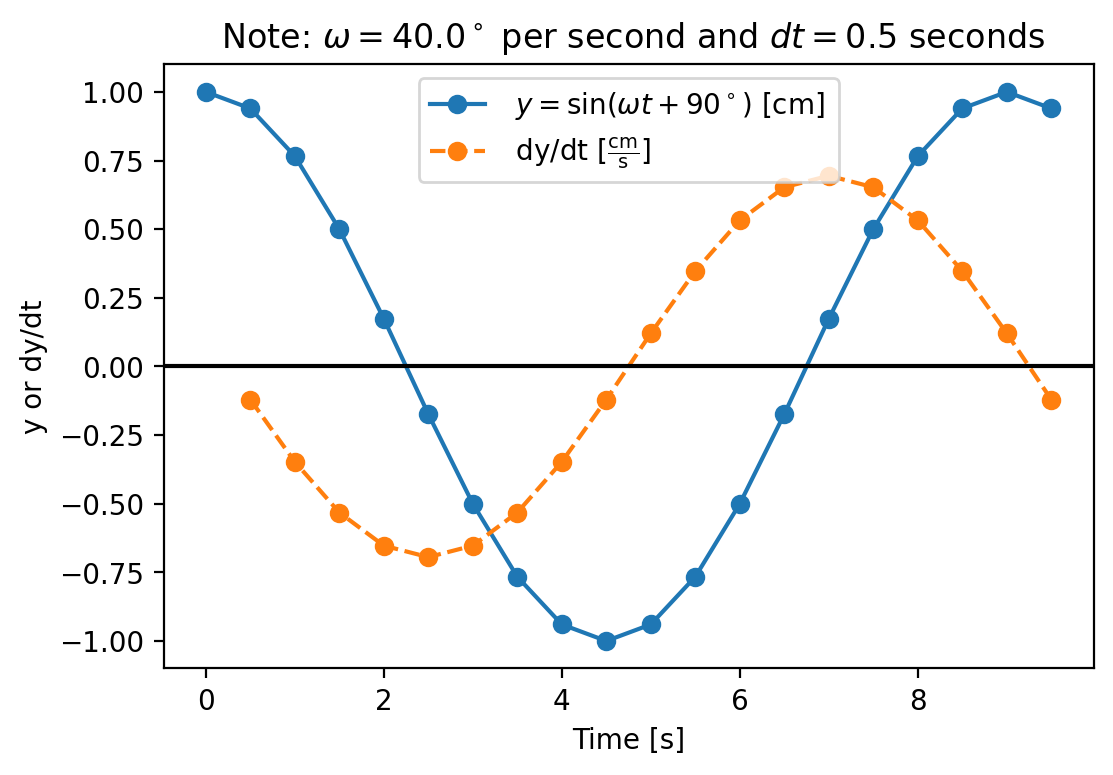

In [40]:
# prepare to make arrays and plot arrays
import numpy as np
import matplotlib.pyplot as plt


'''
Objective
---------
Create plot with two sinusoidal curves.  The first will follow: y = sin( w*t + 90), where w = angular velocity.
The second line will be a derivative of the first line.  
'''

#
# x-axis will be time domain
#
dt = u.Quantity( 0.5, 's' ) # time step in units of seconds

times = np.arange(0, 10, dt.value) * u.s  # time in units of seconds


#
# from class, you've seen how complicated unit-conversions can be when angles (in units of radians) are involved
# -- for simplicity, let's avoid units when doing calculations with angles
#
#
omega_deg = 40.  # [degrees per second] 
angles_deg = omega_deg*times.value  + 90  # [degrees]


# 
# y-axis will have two meanings.  Make two arrays and keep track of (astropy) units.
#
# <--insert code-->

# begin plotting
fig, ax = plt.subplots(dpi=200)

# use LaTeX in the labels
# -- In strings, the "math mode" of LaTeX is invoked by the dollar sign "$"
# -- Usually (but not always), that string of text must be prefaced with an "r" character 
# ----- This represents "raw text" 
# ----- An "f" character, means "formatted text"

# plot both lines, each have its own label
# <--insert code-->

ax.axhline(y=0, color='k')  # black horizontal line for clarity

ax.set_xlabel( 'Time [s]' ) 
ax.set_ylabel(' y or dy/dt ')
# set the title
# <--insert code-->

# after labels have been established for each line, plot the legend
plt.legend( loc='upper center' )
plt.show()
plt.close()

In [39]:
# As an array, astropy still keeps track of the units

print(dpdt)  # here is my displacement/time-elapsed array
print('')
print(dpdt * dt) # here is that same array being multiplied by a time-step.

[-0.12061476 -0.34729636 -0.53208889 -0.65270364 -0.69459271 -0.65270364
 -0.53208889 -0.34729636 -0.12061476  0.12061476  0.34729636  0.53208889
  0.65270364  0.69459271  0.65270364  0.53208889  0.34729636  0.12061476
 -0.12061476] cm / s

[-0.06030738 -0.17364818 -0.26604444 -0.32635182 -0.34729636 -0.32635182
 -0.26604444 -0.17364818 -0.06030738  0.06030738  0.17364818  0.26604444
  0.32635182  0.34729636  0.32635182  0.26604444  0.17364818  0.06030738
 -0.06030738] cm
